In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("C:/Users/ALIM/Downloads/LemonPrices.csv")

In [53]:
df

,Market,Date,Arrivals (Tonnes),Variety,Modal Price(Rs./Quintal),State,Year,Month
0,Gopalavaram,01-01-2022,21.40,V1,1500.00,ANP,2022.0,1.0
1,Tenali,01-01-2022,15.00,V1,1800.00,ANP,2022.0,1.0
2,Durg,01-01-2022,1.80,V1,3800.00,CHH,2022.0,1.0
3,Rajnandgaon,01-01-2022,1.00,V1,2000.00,CHH,2022.0,1.0
4,Ahmedabad,01-01-2022,37.70,Other,1650.00,GUJ,2022.0,1.0
...,...,...,...,...,...,...,...,...
157829,Rudrapur,23-11-2024,5.00,Other,6000.00,UTK,2024.0,11.0
157830,Sonari,NaN,0.45,V1,1500.75,ASM,2024.0,11.0
157831,Sonari,NaN,0.24,V1,1600.80,ASM,2024.0,11.0
157832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna(subset=['Date', 'Market'])

In [54]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [6]:
df['Date']

0        2022-01-01
1        2022-01-01
2        2022-01-01
3        2022-01-01
4        2022-01-01
            ...    
157825   2024-11-23
157826   2024-11-23
157827   2024-11-23
157828   2024-11-23
157829   2024-11-23
Name: Date, Length: 157829, dtype: datetime64[ns]

In [12]:
df.isnull().sum()

Market                        0
Date                          0
Arrivals (Tonnes)             0
Variety                     104
Modal Price(Rs./Quintal)      0
State                         0
Year                          0
Month                         0
dtype: int64

In [13]:
df['Price_Z'] = df.groupby('Market')['Modal Price(Rs./Quintal)'].transform(lambda x: zscore(x.fillna(0)))

In [14]:
df_clean = df[df['Price_Z'].abs() <= 3].copy()


In [15]:
df_clean.drop(columns=['Price_Z'], inplace=True)

In [16]:
df_clean['Year'] = df_clean['Date'].dt.year

In [17]:
df_clean['Month'] = df_clean['Date'].dt.month

In [25]:
yearly_avg_all_india = df_clean.groupby('Year')['Modal Price(Rs./Quintal)'].mean()

In [26]:
monthly_avg_all_india = df_clean.groupby(['Year', 'Month'])['Modal Price(Rs./Quintal)'].mean()

In [24]:
yearly_avg_by_state = df_clean.groupby(['State', 'Year'])['Modal Price(Rs./Quintal)'].mean()

In [28]:
monthly_avg_by_state = df_clean.groupby(['State', 'Year', 'Month'])['Modal Price(Rs./Quintal)'].mean()

In [31]:
monthly_series = df_clean.groupby(pd.Grouper(key='Date', freq='M'))['Modal Price(Rs./Quintal)'].mean()

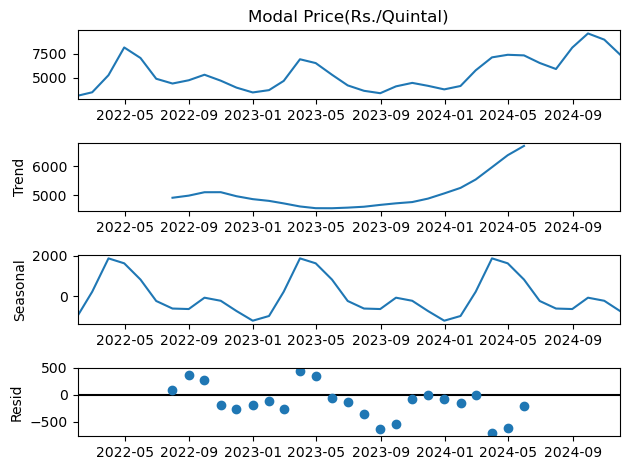

In [36]:
decomposition = seasonal_decompose(monthly_series.dropna(), model='additive')
decomposition.plot()
plt.show()

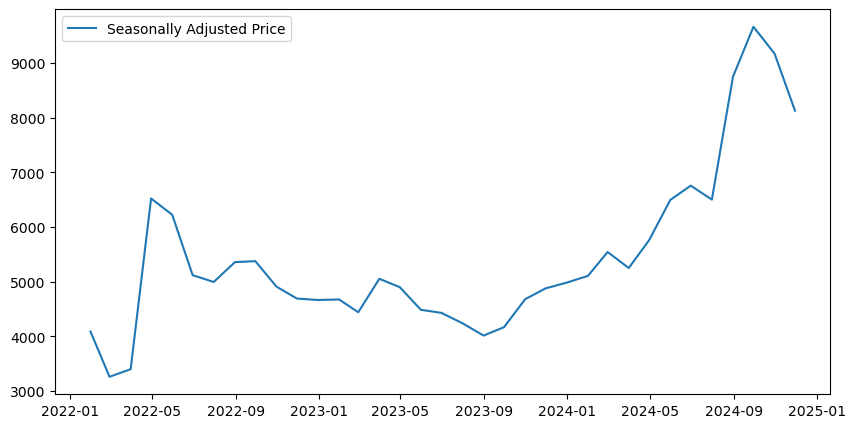

In [39]:
seasonally_adjusted = monthly_series - decomposition.seasonal
plt.figure(figsize=(10, 5))
plt.plot(seasonally_adjusted, label="Seasonally Adjusted Price")
plt.legend()
plt.show()

In [44]:
model = ExponentialSmoothing(seasonally_adjusted.dropna(), trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

In [48]:
forecast = fit.forecast(6)
print("Forecast for next 6 months:")
print(forecast)

Forecast for next 6 months:
2024-12-31     8485.908863
2025-01-31     8788.846461
2025-02-28     8924.712675
2025-03-31     9165.485959
2025-04-30    10283.289943
2025-05-31    10272.571078
Freq: M, dtype: float64


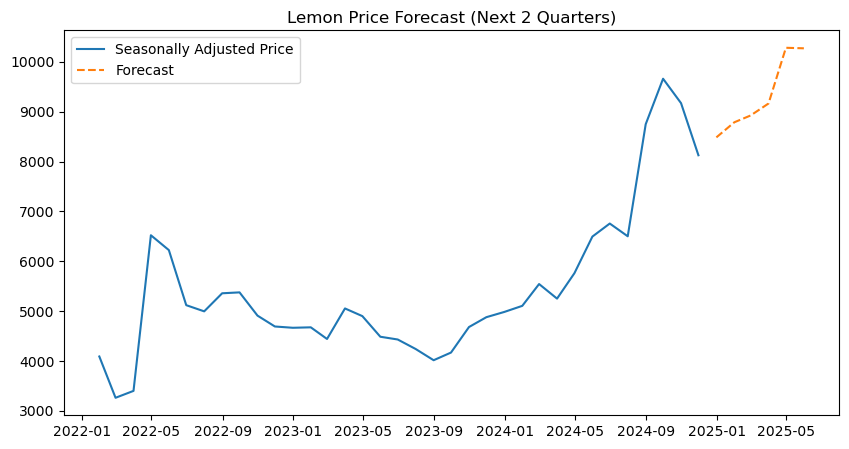

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(seasonally_adjusted, label="Seasonally Adjusted Price")
plt.plot(forecast, label="Forecast", linestyle='--')
plt.legend()
plt.title("Lemon Price Forecast (Next 2 Quarters)")
plt.show()